#DL Image Classification using Sequential Model
##Goal:
Explore deep learning with a simple image classifier using a custom sequential model. For this project I specifically trained it on the cifar10 dataset which is a dataset containing 50,000 images of 10 distinct categories. Purpose is not to get an amazing model but to simply "fiddle" around with deep learning and use what I learn as a stepping stone to my continuing project portfolio.

##Build Version
2.0

##References (To Dataset)
- Alex Krizhevsky, "Learning Multiple Layers of Features from Tiny Images," 2009.  
  Available at: [https://www.cs.toronto.edu/~kriz/cifar.html](https://www.cs.toronto.edu/~kriz/cifar.html)


#Importing (Not Universal)
Basic package importing

In [ ]:
!pip install scikit-image # Execute only once

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

import keras
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split

#Data Visualization
Important for later when creating the model's layers.

In [ ]:
# class/category names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample(x, y, index=0):
  plt.figure(figsize = (10, 1))
  plt.imshow(x[index])
  plt.title(f"Label: {class_names[y[index][0]]}")
  plt.axis('off')
  plt.show()

In [ ]:
# Load the cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Check the shapes of the arrays (important for model creation)
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Training data size:", np.prod(x_train.shape))
print("Test data size:", np.prod(x_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training data size: 153600000
Test data size: 30720000


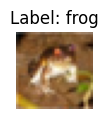

In [ ]:
# plot a frog
plot_sample(x_train, y_train, index=0)

#Create model
Created the custom Sequential model for IC, consisting of multiple convolutional layers, max-pooling layers, flattening, and fully connected (dense) layers.
- Conv2D: Convolutional layers that consist of filters that change the dimension of the intermediate output space. Using padding to make sure output has same size as input (important because input size is 32x32x3 which is fairly small.
- MaxPooling2D: A layer that limits the area in the image at which the strides cover.
- Flatten: This layer prepares the relevant features resulting from the Conv2D and MaxPooling2D layers for classification by passing them to the dense layers.
- Dense: Neural network layer with the kernels (weight matrix) and activation function (dependent on data being analyzed). Output layer weights matrix by convention to dataset, cifar10, must remain 10x10.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(32, 32, 3)),

    # ✅ Stronger stem (no early stride; keep info at 32x32)
    layers.Conv2D(64, 3, padding="same", use_bias=False),
    layers.BatchNormalization(),
    layers.ReLU(),

    layers.Conv2D(64, 3, padding="same", use_bias=False),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2),  # -> 16x16

    # ✅ Deeper feature extractor
    layers.Conv2D(128, 3, padding="same", use_bias=False),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Conv2D(128, 3, padding="same", use_bias=False),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(2),  # -> 8x8

    layers.Conv2D(256, 3, padding="same", use_bias=False),
    layers.BatchNormalization(),
    layers.ReLU(),

    # ✅ Global average pooling beats Flatten on small images
    layers.GlobalAveragePooling2D(),

    # ✅ Light classifier head with regularization
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(5e-4)),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 16, 16, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer3 (Dense)                       │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,778 (260.85 KB)

 Trainable params: 66,778 (260.85 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
feature_extractor = keras.Model(
    inputs=model.inputs,
    outputs=[layer.output for layer in model.layers], # all intermediate layer outputs
)

x = tf.ones((1, 32, 32, 3))
features = feature_extractor(x)

In [ ]:
features_last_conv = features[4] # confirm shape of layer before flatten layer (important for config)
print(features_last_conv.shape)

(1, 2, 2, 64)


In [ ]:
features_pool = features[5] # confirm shape of flatten layer
print(features_pool.shape)

(1, 256)


#Data Preprocessing
Used standard normalization techniques to convert data to numpy arrays for the creation of training and testing datasets. Shuffling is done to remove previous bias where validation samples were only taken from last 2-3 classes.

In [ ]:
from sklearn.utils import shuffle

# Preprocess the data
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Important Step: Shuffle the data to ensure class distribution is randomized
x_train, y_train = shuffle(x_train, y_train, random_state=42)

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [ ]:
'''
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)
'''

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Training
Using multiple callbacking techniques to prevent overfitting and save time.

When I refer to callbacking, I am talking about dynamically adjusting the training process by modifying the model fitting in response to certain conditions during training.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # updates weights during session
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1) # updates LR during session

print("Fit model on training data")
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)


Fit model on training data
Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 87ms/step - accuracy: 0.2217 - loss: 2.0485 - val_accuracy: 0.4203 - val_loss: 1.5538 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.4675 - loss: 1.4675 - val_accuracy: 0.5297 - val_loss: 1.3040 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.5563 - loss: 1.2342 - val_accuracy: 0.5653 - val_loss: 1.2042 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.6008 - loss: 1.1175 - val_accuracy: 0.5971 - val_loss: 1.1157 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.6387 - loss: 1.0138 - val_accuracy: 0.6082 - val_loss: 1.0922 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.6629 - loss: 0.9452 - val_accuracy: 0.6285 - val_loss: 1.0582 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/

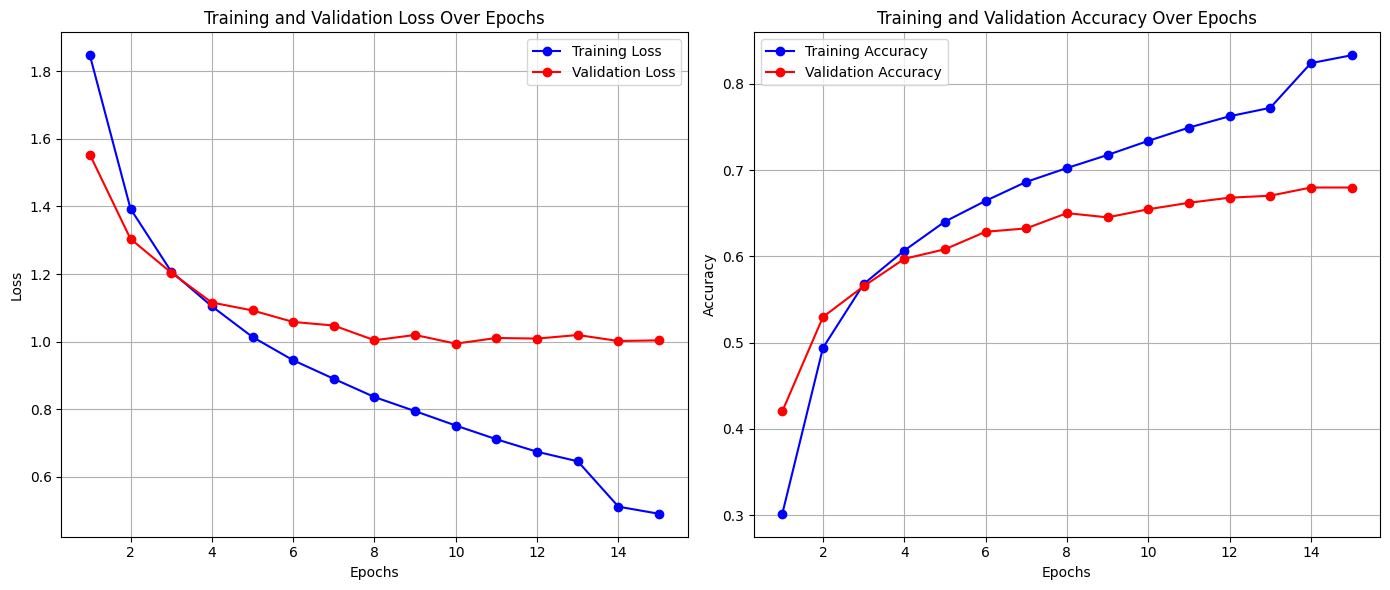

In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(14, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

#Evaluation Metrics
- Analyzing validation loss and accuracy on test data by through standard means

In [ ]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6698 - loss: 0.9592
test loss, test acc: [0.9834908246994019, 0.6636999845504761]
Generate predictions for 3 samples
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
predictions shape: (3, 10)


In [ ]:
# Testing individual predictions
y_test = y_test.reshape(-1,)
y_test[:5]

array([3., 8., 8., 0., 6.], dtype=float32)

IndexError: invalid index to scalar variable.

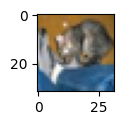

In [ ]:
# Resonable Inference: Model found it difficult to recognize this picture is a cat.
plot_sample(x_test, y_test, 0)

In [ ]:
y_pred = model.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[2.02718089e-04, 7.78586254e-05, 1.55254798e-02, 3.94663781e-01,
        9.57656477e-04, 5.78031480e-01, 8.80676415e-03, 8.95211997e-04,
        7.63162680e-04, 7.59122777e-05],
       [4.51708227e-01, 4.49148454e-02, 5.17064298e-04, 5.32391059e-05,
        5.79361258e-05, 1.66657799e-06, 1.37500626e-06, 2.83493387e-06,
        4.91639912e-01, 1.11028347e-02],
       [2.17766762e-01, 8.15431252e-02, 1.99011229e-02, 2.20317282e-02,
        1.58864018e-02, 4.66726953e-03, 1.26330159e-03, 3.61167709e-03,
        5.61736226e-01, 7.15923533e-02],
       [9.59647655e-01, 1.55588391e-03, 2.72323135e-02, 2.79267639e-04,
        2.04427866e-03, 1.13127235e-05, 3.91357717e-05, 2.20118363e-05,
        9.06259473e-03, 1.05545332e-04],
       [1.49842244e-05, 1.28776330e-04, 2.46248413e-02, 1.03806950e-01,
        3.25696379e-01, 1.21654235e-02, 5.33340037e-01, 2.15289168e-04,
        6.45720911e-06, 9.46275463e-07]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report

y_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.70      0.72      0.71      1000
         1.0       0.81      0.76      0.78      1000
         2.0       0.51      0.60      0.56      1000
         3.0       0.45      0.54      0.49      1000
         4.0       0.60      0.56      0.58      1000
         5.0       0.57      0.53      0.55      1000
         6.0       0.76      0.71      0.74      1000
         7.0       0.75      0.69      0.72      1000
         8.0       0.81      0.77      0.79      1000
         9.0       0.75      0.73      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.67     10000
weighted avg       0.67      0.66      0.67     10000



#Results
- I made an AI that can differenciate 10 significantly different types of categories.

###Training Results
- Accuracy: ~83.51%
- Loss: ~48.37%
- Validation Accuracy: ~67.98%
- Validation Loss: ~100%

###Testing Results
- Accuracy: ~66%
- Loss: ~98.34%

##What did I learn?
- Unless you are using transfer learning, you should not try creating your own model.
- High validation Loss (100%) indicates Signifies overfitting, possibly due to lack of hyperparamaterization and data augmentation

Time Spent on Programming: 4 hours

Cumulative Time Spent Researching: ~30 hours

###Reset Environment

In [ ]:
%reset -f

###Extra Code
- Checking class distribution (making sure validation data is normalized)

In [ ]:
# Count occurrences of each class in y_train and y_val
train_class_counts = np.bincount(y_train.astype("int").flatten(), minlength=len(class_names))
val_class_counts = np.bincount(y_val.astype("int").flatten(), minlength=len(class_names))

# Plot the distribution
x = np.arange(len(class_names))  # Indices for class names

plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, train_class_counts, width=0.4, label='Training Set', color='blue', alpha=0.7)
plt.bar(x + 0.2, val_class_counts, width=0.4, label='Validation Set', color='orange', alpha=0.7)
plt.xticks(x, class_names, rotation=45)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training and Validation Sets')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
